In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from pandas.io.data import DataReader
# Scrapes stocks from internet

In [4]:
from datetime import datetime

In [6]:
from __future__ import division

In [7]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [8]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [11]:
for stock in tech_list :
    globals()[stock] = DataReader(stock, 'yahoo', start, end)
    
# globals()[X] assigns stock string as a global variable (dataframe in this case)

[<matplotlib.text.Text at 0x123553510>, <matplotlib.text.Text at 0x123a37f50>]

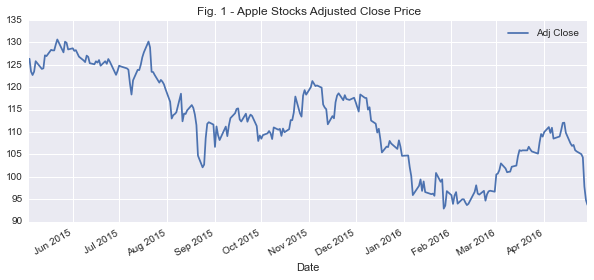

In [65]:
ax = AAPL['Adj Close'].plot(legend=True, figsize=(10,4))
ax.set(xlabel='Date', title='Fig. 1 - Apple Stocks Adjusted Close Price')

The adjusted close position of Apple stocks over the past year.

[<matplotlib.text.Text at 0x1235bf0d0>, <matplotlib.text.Text at 0x1238b77d0>]

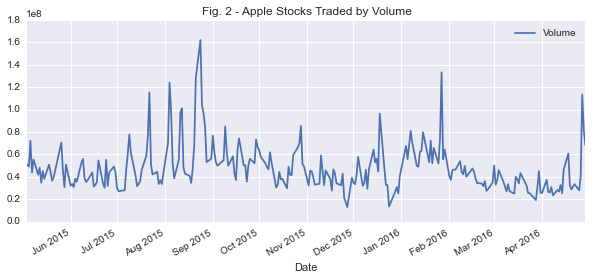

In [64]:
ax = AAPL['Volume'].plot(legend=True, figsize=(10,4))
ax.set(xlabel='Date', title='Fig. 2 - Apple Stocks Traded by Volume')

The volume of Apple stocks traded over the past year.

In [16]:
ma_day = [10, 20, 50]

for ma in ma_day :
    column_name = "MA for %d days" % ma
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'], ma)
    
# Insert a column for 10, 20 and 50 point moving averages

[<matplotlib.text.Text at 0x123b8a250>, <matplotlib.text.Text at 0x123b81a90>]

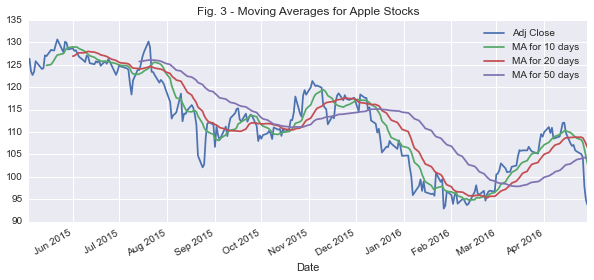

In [66]:
ax = AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False, figsize=(10,4))
ax.set(xlabel='Date', title='Fig. 3 - Moving Averages for Apple Stocks')

In [22]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# % change is already a pandas method

[<matplotlib.text.Text at 0x123d82a10>, <matplotlib.text.Text at 0x124077bd0>]

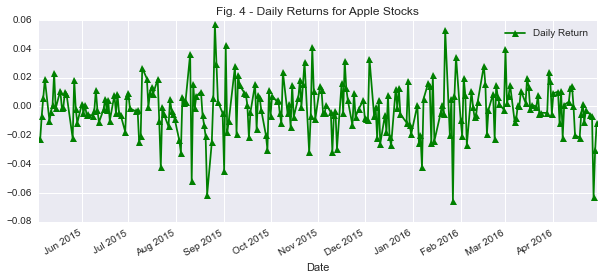

In [68]:
ax = AAPL['Daily Return'].plot(figsize=(10,4), legend=True, color='green',linestyle='-', marker='^')
ax.set(xlabel='Date', title='Fig. 4 - Daily Returns for Apple Stocks')

Daily returns as a plot is too messy and close to net zero.

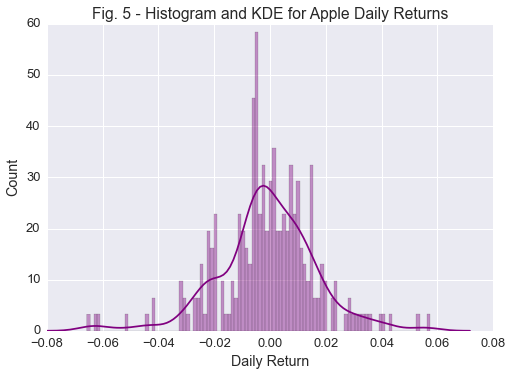

In [70]:
sns.set(rc={"figure.figsize": (10, 4)})
sns.set(font_scale=1.3)
ax = sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')
ax.set(xlabel='Daily Return', ylabel='Count', title='Fig. 5 - Histogram and KDE for Apple Daily Returns')

Daily returns as a distribution/histogram is more informative. We can see the modal value is below zero, but the distribution seems skewed in the positive direction.

In [36]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']
# One dataframe for all tech_list companies, adj close data

In [38]:
tech_rets = closing_df.pct_change()

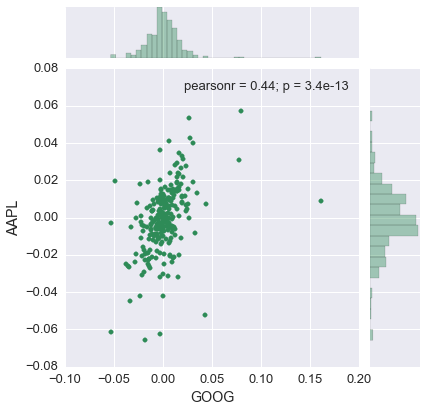

In [40]:
sns.jointplot(x='GOOG', y='AAPL', data=tech_rets, kind='scatter', color='seagreen')

A joint scatterplot for Google and Apple daily returns.

N.B. (|r| < 0.3) -> weak correlation; (0.3 < |r| < 0.5) -> medium correlation; (|r| > 0.5) -> strong correlation.

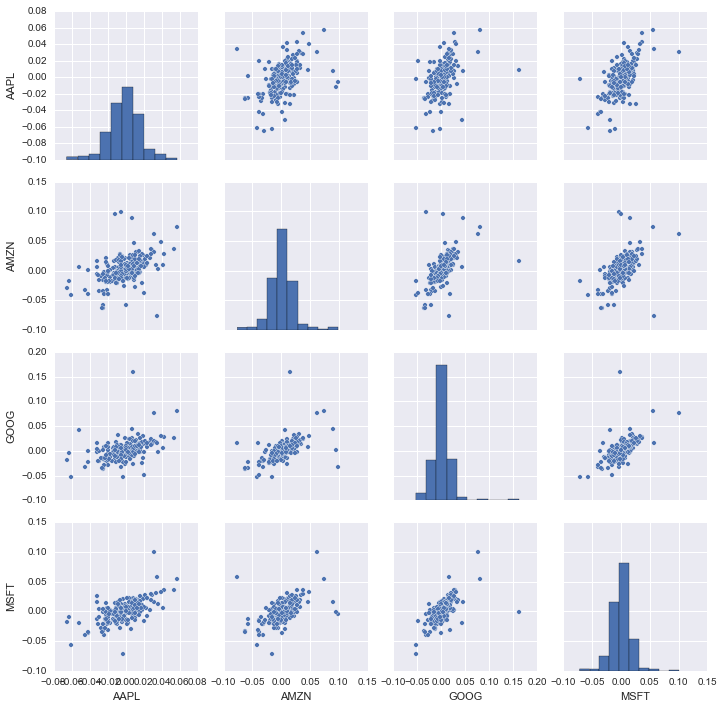

In [45]:
sns.pairplot(tech_rets.dropna())

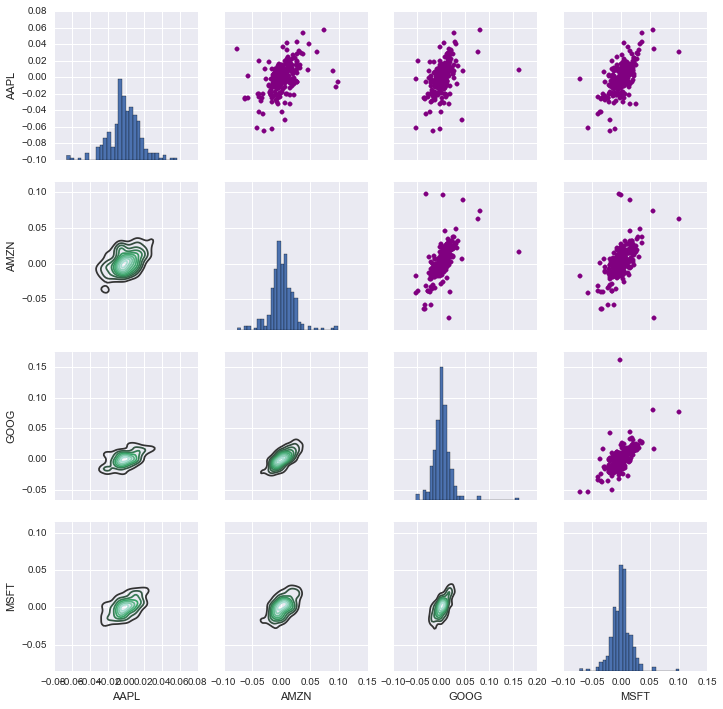

In [49]:
fig = sns.PairGrid(tech_rets.dropna())
fig.map_upper(plt.scatter, color='purple')
fig.map_lower(sns.kdeplot, color='hlr')
fig.map_diag(plt.hist, bins=30)

pairplot is nice and easy scatterplots for all columns in a dataframe (diag is histogram), whilst PairGrid is more customisable. corrplot explicitly calculates the coefficients.

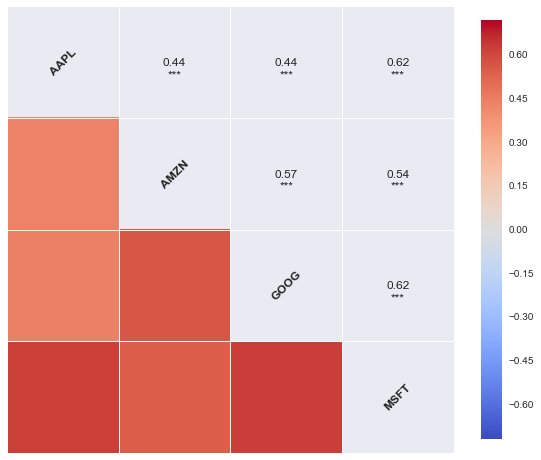

In [58]:
sns.corrplot(tech_rets.dropna(), annot=True)
sns.set(rc={"figure.figsize": (10, 10)})